In [1]:
import matplotlib.pyplot as plt
from sysidentpy.metrics import mean_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.general_estimators import NARX
from sklearn.linear_model import BayesianRidge, ARDRegression
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sysidentpy.basis_function._basis_function import Polynomial, Fourier
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation

In [2]:
# simulated dataset
x_train, x_valid, y_train, y_valid = get_siso_data(
    n=10000,
    colored_noise=False,
    sigma=0.01,
    train_percentage=80
)

## without narx

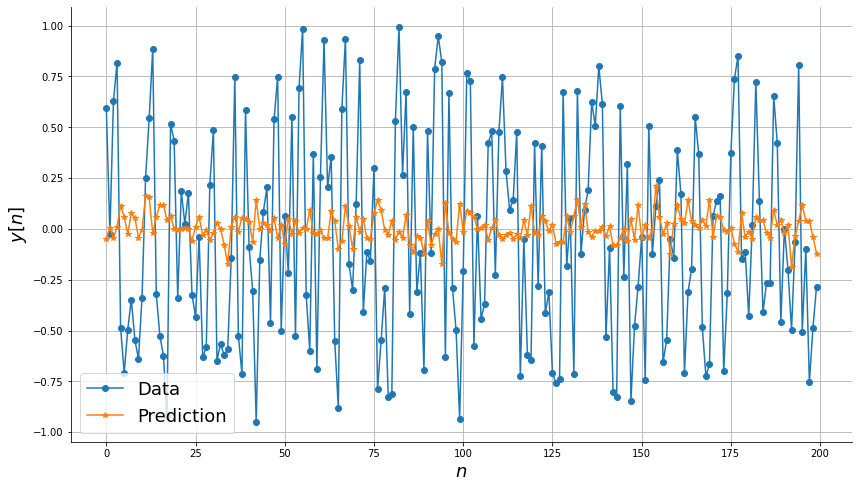

In [3]:
catboost = CatBoostRegressor(
    iterations=300,
    learning_rate=0.1,
    depth=6
)

gb = GradientBoostingRegressor(
    loss='quantile',
    alpha=0.90,
    n_estimators=250,
    max_depth=10,
    learning_rate=.1,
    min_samples_leaf=9,
    min_samples_split=9
)

def plot_results_tmp(y_valid, yhat):
    _, ax = plt.subplots(figsize=(14, 8))
    ax.plot(y_valid[:200], label='Data', marker='o')
    ax.plot(yhat[:200], label='Prediction', marker='*')
    ax.set_xlabel("$n$", fontsize=18)
    ax.set_ylabel("$y[n]$", fontsize=18)
    ax.grid()
    ax.legend(fontsize=18)
    plt.show()

catboost.fit(x_train, y_train, verbose=False)
plot_results_tmp(y_valid, catboost.predict(x_valid))